<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




# **Solución**
### **1) Exponencial. Serie Alternante. (SerieEn)**

In [2]:
# Estudiante: Alejandro Rios Yepes (CC1036966630)
# Exponencial, Serie Alternante.
# Escriba un programa para calcular e^-x

import math

def calcular_e_negativo_x(x, terminos):
    resultado = 1.0  # Inicializamos el resultado con el primer término de la serie
    factorial = 1.0

    for i in range(1, terminos):
        factorial *= i
        termino = (-x ** i) / factorial
        resultado += termino

    return resultado

# Valor de x para el que queremos calcular e^(-x)
x = float(input("Ingrese el valor de x: "))
# Número de términos en la serie
terminos = int(input("Ingrese el número de términos en la serie: "))

resultado_aproximado = calcular_e_negativo_x(x, terminos)

# Comparamos con el valor real usando la función math.exp
valor_real = math.exp(-x)

print(f"Valor aproximado de e^(-{x}): {resultado_aproximado}")
print(f"Valor real de e^(-{x}): {valor_real}")

Ingrese el valor de x: 20
Ingrese el número de términos en la serie: 30
Valor aproximado de e^(-20.0): -474579753.64050984
Valor real de e^(-20.0): 2.061153622438558e-09


In [3]:
# Calcule su serie para x≤1 y compárela con la función incorporada exp(x)

def calcular_e_negativo_x(x, tolerancia):
    resultado = 1.0
    termino = 1.0
    i = 1

    while abs(termino) >= tolerancia:
        termino = (-x ** i) / math.factorial(i)
        resultado += termino
        i += 1

    return resultado

# Valor de x para el que queremos calcular e^(-x)
x = float(input("Ingrese el valor de x: "))

# Tolerancia (10^(-7)) para determinar cuándo detener el cálculo
tolerancia = 1e-7

resultado_aproximado = calcular_e_negativo_x(x, tolerancia)

# Valor real de e^(-x) usando la función incorporada math.exp
valor_real = math.exp(-x)

print(f"Valor aproximado de e^(-{x}): {resultado_aproximado}")
print(f"Valor real de e^(-{x}): {valor_real}")


Ingrese el valor de x: 15
Valor aproximado de e^(-15.0): -3269015.3724720916
Valor real de e^(-15.0): 3.059023205018258e-07


In [4]:
# Examine los términos de la serie para x≈10
# Observe las cancelaciones sustractivas significativas que ocurren cuando los términos grandes se suman para dar respuestas pequeñas

def calcular_e_negativo_x(x, tolerancia):
    resultado = 1.0
    termino = 1.0
    i = 1

    while abs(termino) >= tolerancia:
        termino = (-x ** i) / math.factorial(i)
        resultado += termino
        i += 1
        print(f"Término {i}: {termino}")

    return resultado

# Valor de x para el que queremos calcular e^(-x)
x = float(input("Ingrese el valor de x: "))

# Tolerancia (10^(-7)) para determinar cuándo detener el cálculo
tolerancia = 1e-7

resultado_aproximado = calcular_e_negativo_x(x, tolerancia)

# Valor real de e^(-x) usando la función incorporada math.exp
valor_real = math.exp(-x)

print(f"Valor aproximado de e^(-{x}): {resultado_aproximado}")
print(f"Valor real de e^(-{x}): {valor_real}")


Ingrese el valor de x: 20
Término 2: -20.0
Término 3: -200.0
Término 4: -1333.3333333333333
Término 5: -6666.666666666667
Término 6: -26666.666666666668
Término 7: -88888.88888888889
Término 8: -253968.25396825396
Término 9: -634920.6349206349
Término 10: -1410934.7442680777
Término 11: -2821869.4885361553
Término 12: -5130671.797338464
Término 13: -8551119.662230773
Término 14: -13155568.711124267
Término 15: -18793669.58732038
Término 16: -25058226.116427176
Término 17: -31322782.645533968
Término 18: -36850332.524157606
Término 19: -40944813.91573068
Término 20: -43099804.12182177
Término 21: -43099804.12182177
Término 22: -41047432.49697311
Término 23: -37315847.72452101
Término 24: -32448563.23871392
Término 25: -27040469.365594935
Término 26: -21632375.49247595
Término 27: -16640288.840366114
Término 28: -12326139.881752677
Término 29: -8804385.62982334
Término 30: -6071990.089533337
Término 31: -4047993.3930222252
Término 32: -2611608.6406595004
Término 33: -1632255.400412188
Té

In [5]:
# Vea si se obtiene una mejor precisión siendo inteligente y usando exp(−x) = 1/ exp(x) para valores de x grandes.
# Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.

def calcular_e_negativo_x(x, tolerancia):
    if x < 0:
        return 1 / calcular_e_negativo_x(-x, tolerancia)

    resultado = 1.0
    termino = 1.0
    i = 1

    while abs(termino) >= tolerancia:
        termino = x ** i / math.factorial(i)
        resultado += termino
        i += 1
        print(f"Término {i}: {termino}")

    return 1 / resultado

# Valor de x para el que queremos calcular e^(-x)
x = float(input("Ingrese el valor de x: "))

# Tolerancia (10^(-7)) para determinar cuándo detener el cálculo
tolerancia = 1e-7

resultado_aproximado = calcular_e_negativo_x(x, tolerancia)

# Valor real de e^(-x) usando la función incorporada math.exp
valor_real = math.exp(-x)

print(f"Valor aproximado de e^(-{x}): {resultado_aproximado}")
print(f"Valor real de e^(-{x}): {valor_real}")


Ingrese el valor de x: 25
Término 2: 25.0
Término 3: 312.5
Término 4: 2604.1666666666665
Término 5: 16276.041666666666
Término 6: 81380.20833333333
Término 7: 339084.2013888889
Término 8: 1211015.0049603174
Término 9: 3784421.890500992
Término 10: 10512283.029169422
Término 11: 26280707.572923556
Término 12: 59728880.84755354
Término 13: 124435168.43240319
Término 14: 239298400.83154464
Término 15: 427318572.91347253
Término 16: 712197621.5224543
Término 17: 1112808783.6288347
Término 18: 1636483505.3365216
Término 19: 2272893757.4118357
Término 20: 2990649680.8050466
Término 21: 3738312101.0063086
Término 22: 4450371548.817034
Término 23: 5057240396.382994
Término 24: 5497000430.851079
Término 25: 5726042115.469875
Término 26: 5726042115.469875
Término 27: 5505809726.413341
Término 28: 5097971968.901242
Término 29: 4551760686.518966
Término 30: 3923931626.309453
Término 31: 3269943021.924544
Término 32: 2637050824.132697
Término 33: 2060195956.3536696
Término 34: 1560754512.3891437
Té

In [6]:
# Al aumentar progresivamente x de 1 a 10, y luego de 10 a 100,
# use su programa para determinar experimentalmente cuándo la serie comienza a perder precisión y cuándo ya no converge.

def calcular_e_negativo_x(x, tolerancia):
    if x < 0:
        return 1 / calcular_e_negativo_x(-x, tolerancia)

    resultado = 1.0
    termino = 1.0
    i = 1

    while abs(termino) >= tolerancia:
        termino = x ** i / math.factorial(i)
        resultado += termino
        i += 1

    return 1 / resultado

# Rango de valores de x a investigar
valores_de_x = list(range(1, 11)) + [10**i for i in range(1, 3)]

# Tolerancia (10^(-7)) para determinar cuándo detener el cálculo
tolerancia = 1e-7

for x in valores_de_x:
    resultado_aproximado = calcular_e_negativo_x(x, tolerancia)
    valor_real = math.exp(-x)

    if abs(resultado_aproximado - valor_real) < tolerancia:
        print(f"Para x = {x}, la serie converge con precisión suficiente.")
    else:
        print(f"Para x = {x}, la serie no converge con la precisión deseada.")

Para x = 1, la serie converge con precisión suficiente.
Para x = 2, la serie converge con precisión suficiente.
Para x = 3, la serie converge con precisión suficiente.
Para x = 4, la serie converge con precisión suficiente.
Para x = 5, la serie converge con precisión suficiente.
Para x = 6, la serie converge con precisión suficiente.
Para x = 7, la serie converge con precisión suficiente.
Para x = 8, la serie converge con precisión suficiente.
Para x = 9, la serie converge con precisión suficiente.
Para x = 10, la serie converge con precisión suficiente.
Para x = 10, la serie converge con precisión suficiente.
Para x = 100, la serie converge con precisión suficiente.


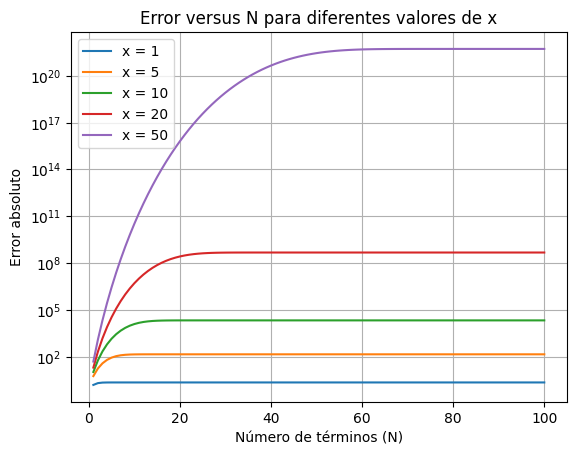

In [7]:
# Haz una serie de gráficas del error versus N para diferentes valores de x.

import matplotlib.pyplot as plt

# Función para calcular la serie de Maclaurin para e^(-x) y retornar una lista de errores en cada paso
def calcular_e_negativo_x(x, N):
    if x < 0:
        return 1 / calcular_e_negativo_x(-x, N)

    resultado = 1.0
    termino = 1.0
    factorial = 1.0
    errores = []  # Almacenar errores en cada paso

    for i in range(1, N + 1):
        factorial *= i
        termino = x ** i / factorial
        resultado += termino
        valor_real = math.exp(-x)
        error = abs(resultado - valor_real)
        errores.append(error)

    return errores

# Valores de x para los que se realizarán las gráficas
valores_de_x = [1, 5, 10, 20, 50]

# Número máximo de términos en la serie
max_N = 100

# Diccionario para almacenar los errores por valor de x
errores_por_x = {}

# Calcula los errores para cada valor de x y almacena los resultados en el diccionario
for x in valores_de_x:
    errores_por_x[x] = calcular_e_negativo_x(x, max_N)

# Graficar los errores versus N para cada valor de x
for x in valores_de_x:
    plt.plot(range(1, max_N + 1), errores_por_x[x], label=f'x = {x}')

plt.yscale('log')  # Escala logarítmica para el eje y (errores)
plt.xlabel('Número de términos (N)')
plt.ylabel('Error absoluto')
plt.title('Error versus N para diferentes valores de x')
plt.legend()
plt.grid(True)
plt.show()

### **2) Cancelación sustractiva**

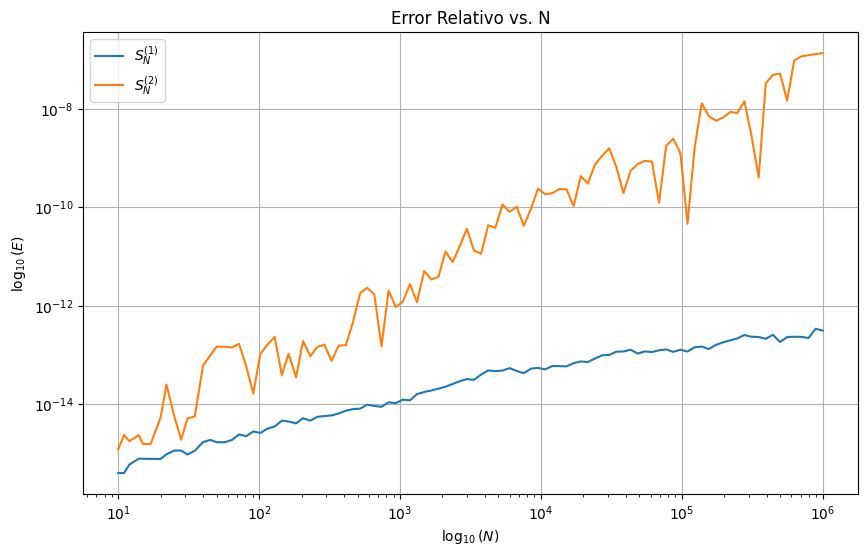

In [19]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular S_N^(1)
def calculate_S1(N):
    S1 = 0
    for n in range(1, 2 * N + 1):
        S1 += (-1) ** n * n / (n + 1)
    return S1

# Función para calcular S_N^(2)
def calculate_S2(N):
    S2 = 0
    for n in range(1, N + 1):
        S2 -= (2 * n - 1) / (2 * n)
    for n in range(1, N + 1):
        S2 += (2 * n) / (2 * n + 1)
    return S2

# Función para calcular S_N^(3) (solución exacta)
def calculate_S3(N):
    S3 = 0
    for n in range(1, N + 1):
        S3 += 1 / (2 * n * (2 * n + 1))
    return S3

# Calcular los valores de S_N^(1), S_N^(2), y S_N^(3) para diferentes valores de N
N_values = np.logspace(1, 6, num=100, dtype=int)
S1_values = []
S2_values = []
S3_values = []

for N in N_values:
    S1_values.append(calculate_S1(N))
    S2_values.append(calculate_S2(N))
    S3_values.append(calculate_S3(N))

# Calcular el error relativo para S_N^(1) y S_N^(2) en comparación con S_N^(3)
error_S1 = np.abs((np.array(S1_values) - np.array(S3_values)) / np.array(S3_values))
error_S2 = np.abs((np.array(S2_values) - np.array(S3_values)) / np.array(S3_values))

# Crear gráficos log-log del error relativo en función de N
plt.figure(figsize=(10, 6))
plt.loglog(N_values, error_S1, label='$S_N^{(1)}$')
plt.loglog(N_values, error_S2, label='$S_N^{(2)}$')
plt.xlabel('$\log_{10}(N)$')
plt.ylabel('$\log_{10}(E)$')
plt.title('Error Relativo vs. N')
plt.legend()
plt.grid(True)
plt.show()
